### Dataset

Boston 주택 가격 예측 모델에서 사용되는 데이터셋은 보스턴 시의 주택 가격 데이터셋으로, 주택의 여러 요건과 가격 정보가 포함되어 있습니다

### Feature에 대한 설명

| feature |                              설명                             |   |   |   |
|:-------:|:-------------------------------------------------------------:|---|---|---|
| CRIM    | 자치시별 1인당 범죄율                                         |   |   |   |
| ZN      | 25,000 평방피트를 초과하는 거주지역의 비율                    |   |   |   |
| INDUS   | 비소매상업지역이 점유하고 있는 토지의 비율                    |   |   |   |
| CHAS    | 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0) |   |   |   |
| NOX     | 10ppm 당 농축 일산화질소                                      |   |   |   |
| RM      | 주택 1 가구당 평균 방의 개수                                  |   |   |   |
| AGE     | 1940년 이전에 건축된 소유주택의 비율                          |   |   |   |
| DIS     | 5개의 보스턴 직업센터까지의 접근성 지수                       |   |   |   |
| RAD     | 방사형 도로까지의 접근성 지수                                 |   |   |   |
| TAX     | 10,000 달러당 재산세율                                        |   |   |   |
| PTRATIO | 자치시(town)별 학생/교사 비율                                 |   |   |   |
| B       | $1000(Bk - 0.63)^2$, 여기서Bk는 자치시별 흑인의 비율을 말함        |   |   |   |
| LSTAT   | 모집단의 하위계층의 비율(%)                                   |   |   |   |
| MEDV    | 본인 소유의 주택가격(중앙값)(단위: $1,000)                    |   |   |   |

### 데이터 로드 및 전처리

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))
print(train_data.shape)
train_data

404
102
(404, 13)


array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# [[YOUR CODE]]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit(train_data).transform(train_data)

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]

x_test = scaler.fit(test_data).transform(test_data)



In [4]:
x_train.shape

(404, 13)

In [5]:
from sklearn.model_selection  import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, random_state=5, test_size=.1)
x_train.shape, x_val.shape

((363, 13), (41, 13))

### 모델 구성 및 컴파일

In [6]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]

from tensorflow.keras import Input, Model, layers
from tensorflow import keras

def model():
    inp = Input(shape = x_train.shape[1])
    x = keras.layers.Dense(64, activation = 'relu')(inp)
    x = keras.layers.Dense(16, activation = 'relu')(x)
    x = keras.layers.Dense(1, activation = 'linear')(x)
    return keras.Model(inputs = inp, outputs = x)

model = model()
model.compile(loss = 'mse',
             optimizer = 'adam',
             metrics = ['mae'])

In [7]:
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(patience=3, monitor='val_loss', mode = 'auto',
                                  restore_best_weights=True)

### 모델 학습

In [8]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history =  model.fit(x_train, y_train, epochs = 100,
                    validation_data = (x_val, y_val),
                    callbacks = [es])

Epoch 1/100
12/12 [==============================] - 1s 14ms/step - loss: 6496.5283 - mae: 66.4899 - val_loss: 494.7283 - val_mae: 17.0211
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 686.8673 - mae: 23.3206 - val_loss: 952.1237 - val_mae: 28.0690
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 378.9867 - mae: 15.9341 - val_loss: 107.2354 - val_mae: 6.9223
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 187.4702 - mae: 10.2139 - val_loss: 110.0953 - val_mae: 7.3029
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 119.1101 - mae: 8.1867 - val_loss: 116.6210 - val_mae: 8.2918
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 101.4496 - mae: 8.0341 - val_loss: 91.4096 - val_mae: 6.7671
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 86.0585 - mae: 6.7766 - val_loss: 82.4690 - val_mae: 5.7925
Epoch 8/100
12/12 [==============================]

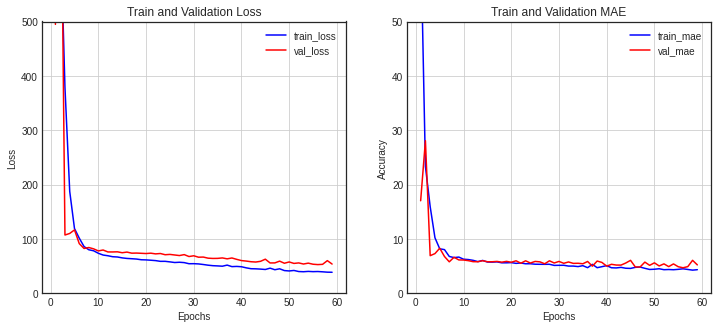

In [9]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_ylim([0,500])
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_ylim([0,50])
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [10]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]

loss, mae, = model.evaluate(x_test, test_labels)
print('TESTSET MSE :',loss)
print('TESTSET MAE :',mae)

4/4 [==============================] - 0s 2ms/step - loss: 597.4785 - mae: 22.7625
TESTSET MSE : 597.478515625
TESTSET MAE : 22.762495040893555
